In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
prices = pd.read_csv('D:\CDW_Step\CDW_intern\Day_3\FB-stock-prices.csv')

In [5]:
prices.head(5)


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [6]:
prices.dtypes

Date     object
Price     int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

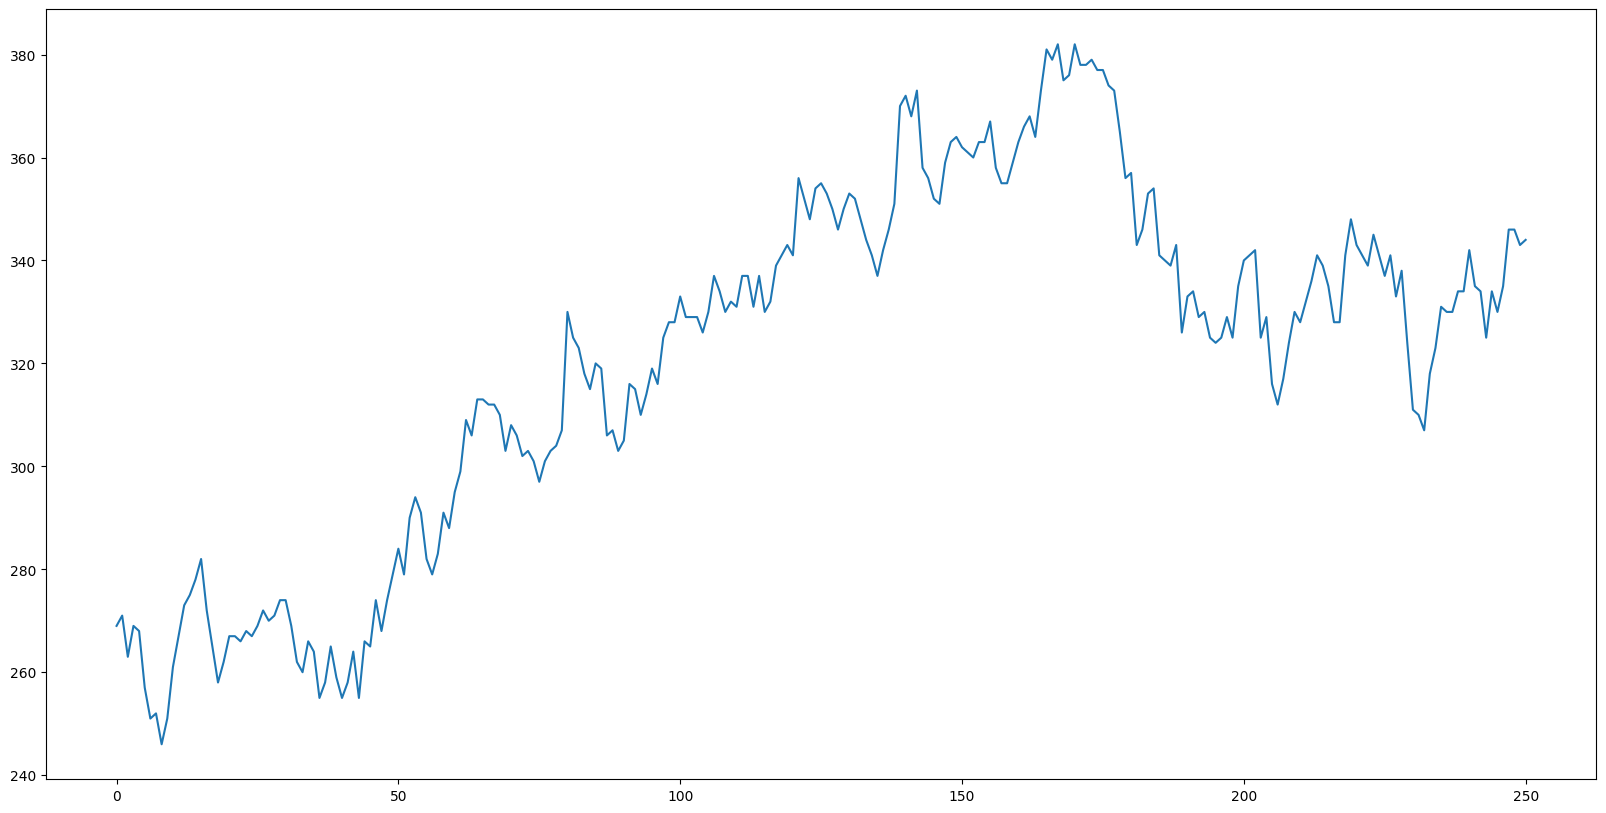

In [7]:
plt.figure(figsize=(20,10))
plt.plot(prices['Price'])
plt.show

In [8]:
prices.count()

Date     251
Price    251
dtype: int64

## Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_prices = scaler.fit_transform(prices[['Price']].values)

In [10]:
print(scaled_prices)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [11]:
total_size = len(scaled_prices)
test_size = 50
train_size = total_size - test_size

In [12]:
print(total_size)
print(test_size)
print(train_size)


251
50
201


In [13]:
Training_prices = scaled_prices[:train_size]
Testing_prices = scaled_prices[train_size:]

In [14]:
print(Training_prices.shape)

(201, 1)


In [15]:
print(Testing_prices.shape)

(50, 1)


In [16]:
def create_rnn_dataset(data,lookback=1):
  data_x = []
  data_y = []
  for i in range(len(data)-lookback-1):
    a = data[i:(i+lookback),0]
    data_x.append(a)
    data_y.append(data[i+lookback,0])
  return np.array(data_x),np.array(data_y)

In [17]:
lookback = 25

train_req_x, train_req_y = create_rnn_dataset(Training_prices,lookback)


In [18]:
train_req_x.shape



(175, 25)

In [19]:
train_req_y.shape

(175,)

In [20]:
train_req_x =  np.reshape(train_req_x,(train_req_x.shape[0],1,train_req_x.shape[1]))


In [21]:
train_req_x.shape




(175, 1, 25)

##

In [22]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf
tf.random.set_seed(3)


In [23]:
price_model = Sequential()
price_model.add(SimpleRNN(32,input_shape=(1,lookback)))
price_model.add(Dense(1))


C:\Users\Sugan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
##optimizer and loss calculation
price_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [25]:
price_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
price_model.fit(train_req_x, train_req_y,epochs=5, batch_size=5,verbose =1)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2773 - mse: 0.2773  
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0956 - mse: 0.0956 
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0706 - mse: 0.0706 
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0590 - mse: 0.0590 
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531 - mse: 0.0531


In [27]:
test_req_x, test_req_y = create_rnn_dataset(Testing_prices,lookback)

In [28]:
test_req_x.shape

(24, 25)

In [29]:
test_req_y.shape

(24,)

In [30]:
test_req_x =  np.reshape(test_req_x,(test_req_x.shape[0],1,test_req_x.shape[1]))


In [31]:
test_req_x.shape

(24, 1, 25)

In [32]:
price_model.evaluate(test_req_x,test_req_y,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0977 - mse: 0.0977


[0.09771943092346191, 0.09771943092346191]

In [33]:
predict_on_test =price_model.predict(test_req_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [34]:
print(predict_on_test)

[[ 0.653329  ]
 [ 0.9155251 ]
 [ 0.7062973 ]
 [ 0.36253786]
 [ 0.1483154 ]
 [-0.06483373]
 [ 0.25060216]
 [ 0.19907741]
 [-0.1795474 ]
 [-0.11085117]
 [ 0.0563527 ]
 [ 0.2526929 ]
 [ 0.36184266]
 [ 0.3535428 ]
 [ 0.5132797 ]
 [ 0.65273607]
 [ 0.7425883 ]
 [ 0.4919971 ]
 [ 0.11654165]
 [ 0.30908164]
 [ 0.12418549]
 [ 0.21897149]
 [ 0.39134392]
 [ 0.5242294 ]]


In [35]:
predicted_value = scaler.inverse_transform(predict_on_test)

In [36]:
print(predicted_value)

[[343.8985 ]
 [353.03226]
 [345.74368]
 [333.76865]
 [326.3061 ]
 [318.88092]
 [329.8693 ]
 [328.0744 ]
 [314.88483]
 [317.2779 ]
 [323.1025 ]
 [329.94214]
 [333.74442]
 [333.4553 ]
 [339.0198 ]
 [343.87784]
 [347.0079 ]
 [338.2784 ]
 [325.19922]
 [331.90646]
 [325.4655 ]
 [328.76743]
 [334.77213]
 [339.40125]]


In [37]:
prices.tail(5)

,Date,Price
246,12/23/2021,335
247,12/27/2021,346
248,12/28/2021,346
249,12/29/2021,343
250,12/30/2021,344


##Predictions


In [38]:
prev_prices = np.array([320,321,322,323,324,
                        326,327,328,329,330,
                        331,332,333,334,335,
                        336,337,338,339,340,
                        341,342,343,344,345])

In [39]:
scaled_prices = scaler.transform(prev_prices.reshape(-1,1))
model_input = np.reshape(scaled_prices,(scaled_prices.shape[1],1,scaled_prices.shape[0]))
pred = price_model.predict(model_input)
stock_pred = scaler.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[346.07684]]
